In [15]:
import matplotlib.pyplot as plt
import np as np
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/mushroom_training_results.csv')
df

,Epoch,Predicted 0,Real 0
0,1,0.223606,1
1,1,0.220017,1
2,1,0.382807,1
3,1,0.701741,0
4,1,0.341209,1
...,...,...,...
28430,5,0.991678,1
28431,5,0.997951,1
28432,5,0.000025,0
28433,5,0.997732,1


Установим порог p = 0.5

In [16]:
p = 0.5
df['Predicted 0'] = np.where(df['Predicted 0'] < 0.5, 0, 1)
df

,Epoch,Predicted 0,Real 0
0,1,0,1
1,1,0,1
2,1,0,1
3,1,1,0
4,1,0,1
...,...,...,...
28430,5,1,1
28431,5,1,1
28432,5,0,0
28433,5,1,1


In [37]:
accuracy_dict = {}
accuracy_data = pd.DataFrame({'Epoch': [], 'Value': []})
# Iterate over each epoch
for epoch, group in df.groupby('Epoch'):
    # Get the predicted and real columns for the epoch
    predicted_cols = group.filter(regex='Predicted')
    real_cols = group.filter(regex='Real')

    # Calculate accuracy for each pair of predicted and real columns
    accuracies = []
    # for pred_col, real_col in zip(predicted_cols, real_cols):
    correct_predictions = len(group[group['Predicted 0'] == group['Real 0']])
    total_predictions = len(group)
    accuracy = correct_predictions / total_predictions
    accuracies.append(accuracy)

    # Store the accuracies for the epoch in the dictionary
    accuracy_dict[epoch] = accuracies
    new_row = {'Epoch': epoch, 'Value': accuracy}
    accuracy_data = pd.concat([accuracy_data, pd.DataFrame([new_row])], ignore_index=True)

for epoch, accuracies in accuracy_dict.items():
    print(f"Epoch {epoch}: {accuracies}")

Epoch 1: [0.9189379286091085]
Epoch 2: [0.9442588359416212]
Epoch 3: [0.9497098646034816]
Epoch 4: [0.9539300158255671]
Epoch 5: [0.9563917707051169]


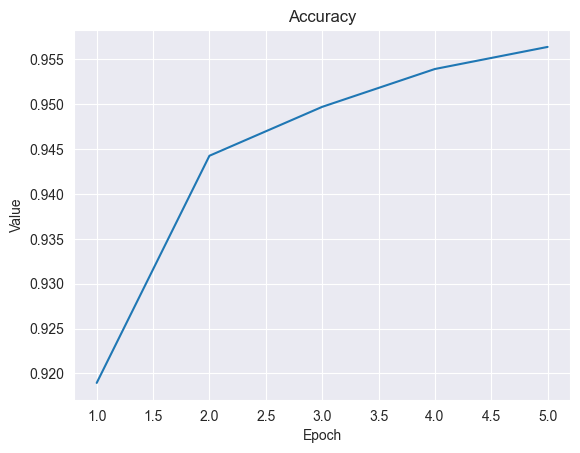

In [38]:
plt.plot(accuracy_data['Epoch'], accuracy_data['Value'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Accuracy')
plt.show()

In [41]:
f_measure_dict = {}
f_measure_data = pd.DataFrame({'Epoch': [], 'Value': []})
# Iterate over each epoch
for epoch, group in df.groupby('Epoch'):
    # Get the predicted and real columns for the epoch
    predicted_cols = group['Predicted 0']
    real_cols = group['Real 0']

    # Calculate true positives, false positives, and false negatives for each pair of predicted and real columns
    tp = ((predicted_cols == 1) & (real_cols == 1)).sum(axis=0)
    fp = ((predicted_cols == 1) & (real_cols == 0)).sum(axis=0)
    fn = ((predicted_cols == 0) & (real_cols == 1)).sum(axis=0)

    # Calculate precision, recall, and F-measure for each pair of columns
    precisions = tp / (tp + fp)
    recalls = tp / (tp + fn)
    f_measures = 2 * (precisions * recalls) / (precisions + recalls)

    # Store the F-measures for the epoch in the dictionary
    f_measure_dict[epoch] = f_measures
    new_row = {'Epoch': epoch, 'Value': f_measures}
    f_measure_data = pd.concat([f_measure_data, pd.DataFrame([new_row])], ignore_index=True)

# Print the F-measure values for each epoch
for epoch, f_measures in f_measure_dict.items():
    print(f"Epoch {epoch}: {f_measures}")

Epoch 1: 0.9371163552039284
Epoch 2: 0.9564500618216787
Epoch 3: 0.9604972375690607
Epoch 4: 0.9637821398949405
Epoch 5: 0.9656889872717213


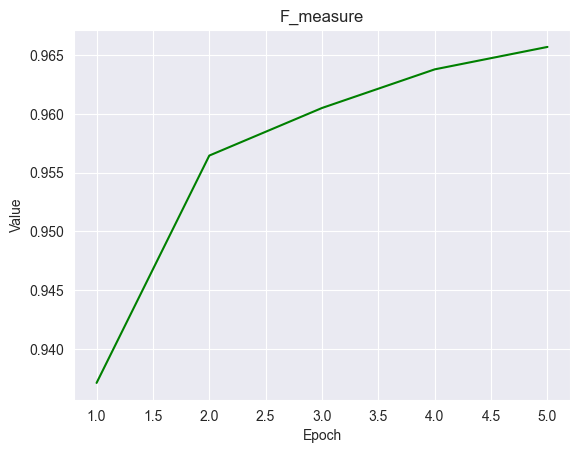

In [45]:
plt.plot(f_measure_data['Epoch'], f_measure_data['Value'], color='green')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('F_measure')
plt.show()

In [51]:
df2 = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/mushroom_testing_results.csv')
display(df2)

,Number,Predicted 0,Real 0
0,0,8.979960e-01,1
1,1,5.192530e-03,0
2,2,1.442110e-04,0
3,3,8.041230e-07,0
4,4,9.200460e-01,1
...,...,...,...
2432,2432,9.847730e-01,1
2433,2433,9.289450e-01,1
2434,2434,9.977230e-01,1
2435,2435,5.508990e-04,0


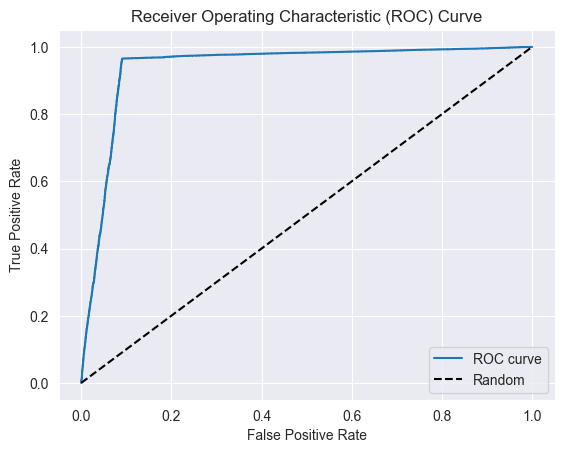

In [52]:
y_true = df['Real 0']
y_scores = df['Predicted 0']

# Sort the true labels and predicted scores in descending order
sorted_indices = y_scores.argsort()[::-1]
y_true_sorted = y_true[sorted_indices]
y_scores_sorted = y_scores[sorted_indices]

# Calculate the number of positive and negative instances
n_positive = sum(y_true)
n_negative = len(y_true) - n_positive

# Initialize variables
tp = 0  # True positives
fp = 0  # False positives
tn = n_negative  # True negatives
fn = n_positive  # False negatives

# Initialize lists to store true positive rate (TPR) and false positive rate (FPR)
tpr_list = [0.0]
fpr_list = [0.0]

# Iterate through the sorted predictions
for i in range(len(y_scores_sorted)):
    if y_true_sorted.iloc[i] == 1:
        tp += 1
        fn -= 1
    else:
        fp += 1
        tn -= 1

    tpr = tp / n_positive
    fpr = fp / n_negative

    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Add (1,1) to the lists to complete the ROC curve
tpr_list.append(1.0)
fpr_list.append(1.0)

# Plot the ROC curve
plt.plot(fpr_list, tpr_list, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()